# Association Rules Problem 1

Prepare rules for the movies dataset 

- Try different values of support and confidence. Observe the change in number of rules for different support,confidence values
- Change the minimum length in apriori algorithm
- Visulize the obtained rules using different plots 

## Steps:

1. Import new data set
    - understand the dataset, look into it. 
    - check data info and null values.
    - tranform to transactional form.
2. Rule Set 1
    - perform apriopri algorithm with different confidence and support values
    - NetworkX Visualizations
3. Rule Set 2
    - perform apriopri algorithm with different confidence and support values
    - NetworkX Visualizations
4. Rule Set 3
    - perform apriopri algorithm with different confidence and support values
    - NetworkX Visualizations
5. Conclusion


## Import New Dataset

In [17]:
#!pip install mlxtend

In [3]:
#load the libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
import networkx as nx
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
raw_data = pd.read_csv("C:/Users/Srupin/Assignments/9_Association_Rules/9Q1/my_movies.csv")
df = raw_data.iloc[:,5:].copy()
df #This is in transaction form.
# No requirement to apply further transactions.

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


## Rule Set 1
- min_support = 0.3
- confidence = 100%

##### Apriori Algorithm - All subsets of a frequent Item set should also be frequent

In [5]:
frequent_itemsets1 = apriori(df,min_support=0.3,use_colnames=True)
frequent_itemsets1['length'] = frequent_itemsets1['itemsets'].apply(lambda x: len(x))
frequent_itemsets1 #Only uptil 3-item itemsets

,support,itemsets,length
0,0.6,(Sixth Sense),1
1,0.7,(Gladiator),1
2,0.6,(Patriot),1
3,0.5,"(Sixth Sense, Gladiator)",2
4,0.4,"(Sixth Sense, Patriot)",2
5,0.6,"(Patriot, Gladiator)",2
6,0.4,"(Sixth Sense, Patriot, Gladiator)",3


In [6]:
rules1 = association_rules(frequent_itemsets1, min_threshold=1) #confidence = 100%
rules1.head() #Rule Set1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Patriot),(Gladiator),0.6,0.7,0.6,1.0,1.428571,0.18,inf
1,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.0,1.428571,0.12,inf


### Visualizations

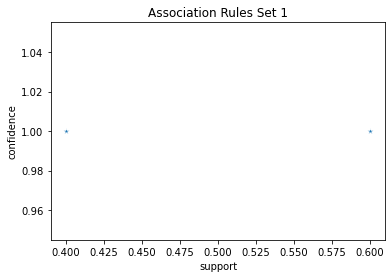

In [7]:
support = rules1.support
confidence=rules1.confidence
 
sns.scatterplot(data=rules1, x = support, y = confidence,  marker="*",palette='Dark')
plt.title("Association Rules Set 1")
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

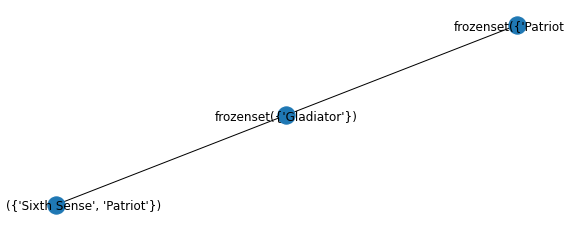

In [8]:
#NetworkX Visualization
fig, ax=plt.subplots(figsize=(10,4))
GA=nx.from_pandas_edgelist(rules1,source='antecedents',target='consequents')
nx.draw(GA,with_labels=True)
plt.show()

## Rule Set 2
- min_support = 0.5
- confidence = 60%

In [9]:
frequent_itemsets2 = apriori(df,min_support=0.5,use_colnames=True)
frequent_itemsets2['length'] = frequent_itemsets2['itemsets'].apply(lambda x: len(x))
frequent_itemsets2 #Only uptil 2-item itemsets

,support,itemsets,length
0,0.6,(Sixth Sense),1
1,0.7,(Gladiator),1
2,0.6,(Patriot),1
3,0.5,"(Sixth Sense, Gladiator)",2
4,0.6,"(Patriot, Gladiator)",2


In [10]:
rules2 = association_rules(frequent_itemsets2, min_threshold=0.60) #confidence = 60%
rules2.head() #Rule Set2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
3,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8


### Visualizations

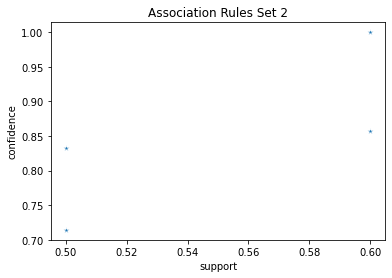

In [11]:
support = rules2.support
confidence=rules2.confidence
 
sns.scatterplot(data=rules2, x = support, y = confidence,  marker="*",palette='Dark')
plt.title("Association Rules Set 2")
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

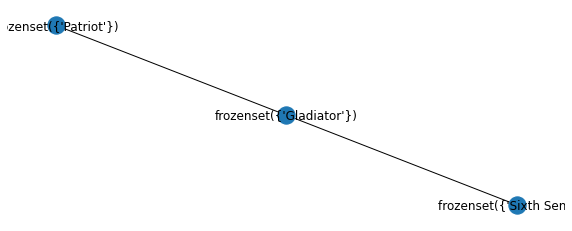

In [12]:
#NetworkX Visualization
fig, ax=plt.subplots(figsize=(10,4))
GA=nx.from_pandas_edgelist(rules2,source='antecedents',target='consequents')
nx.draw(GA,with_labels=True)
plt.show()

## Rule Set 3
- min_support = 0.2
- confidence = 40%

In [13]:
frequent_itemsets3 = apriori(df,min_support=0.2,use_colnames=True)
frequent_itemsets3['length'] = frequent_itemsets3['itemsets'].apply(lambda x: len(x))
frequent_itemsets3 

,support,itemsets,length
0,0.6,(Sixth Sense),1
1,0.7,(Gladiator),1
2,0.2,(LOTR1),1
3,0.2,(Harry Potter1),1
4,0.6,(Patriot),1
5,0.2,(LOTR2),1
6,0.2,(Green Mile),1
7,0.5,"(Sixth Sense, Gladiator)",2
8,0.4,"(Sixth Sense, Patriot)",2
9,0.2,"(Sixth Sense, Green Mile)",2


In [14]:
rules3 = association_rules(frequent_itemsets3, min_threshold=0.40) #confidence = 40%
rules3.head() #Rule Set3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf


### Visualizations

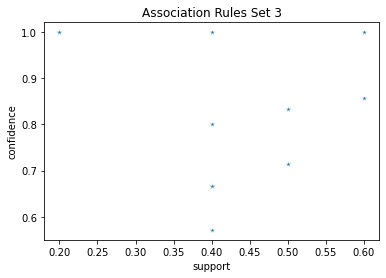

In [15]:
support = rules3.support
confidence=rules3.confidence
 
sns.scatterplot(data=rules3, x = support, y = confidence,  marker="*",palette='Dark')
plt.title("Association Rules Set 3")
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

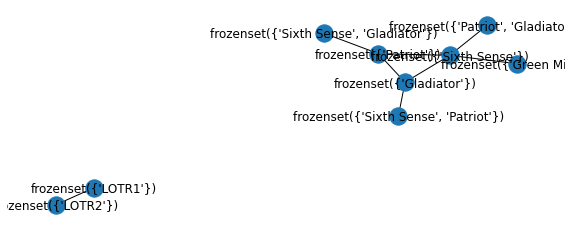

In [16]:
#NetworkX Visualization
fig, ax=plt.subplots(figsize=(10,4))
GA=nx.from_pandas_edgelist(rules3,source='antecedents',target='consequents')
nx.draw(GA,with_labels=True)
plt.show()

## Conclusion
- Initial dataset was examined and transaction form was created.
- Three sets of Rules were generated for different values of support and confidence.
- Network Visualizations were plotted for each set.